# Exploratory Data Analysis on the Automobile Data Set

## Import Necessary Packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Read in Data

In [2]:
car = pd.read_csv('../automobile.txt')
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 1. Data Cleaning and Preparation

### - Detecting and Filling Missing Values

In [3]:
# create function to adress "?" values

def change_nan(col):
    '''Takes in a df column and changes an entry to
    np.nan if it is equal to "?" '''
    
    data = col
    
    if data == "?":
        return np.nan
    else:
        return data

# loop through every column in dataframe and apply the function
for column in car.columns:
    
    car[column] = car[column].apply(change_nan)

# call dataframe head to check it has applied
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### - Change object types to floats

In [4]:
# for numeric features convert objects to floats
# integer in pandas did not want to hold np.nan values - used float as workaround
car['normalized-losses'] = car['normalized-losses'].astype(float)
car['horsepower'] = car['horsepower'].astype(float)
car['peak-rpm'] = car['peak-rpm'].astype(float)
car['price'] = car['price'].astype(float)
car['bore'] = car['bore'].astype(float)
car['stroke'] = car['stroke'].astype(float)
car.info()
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


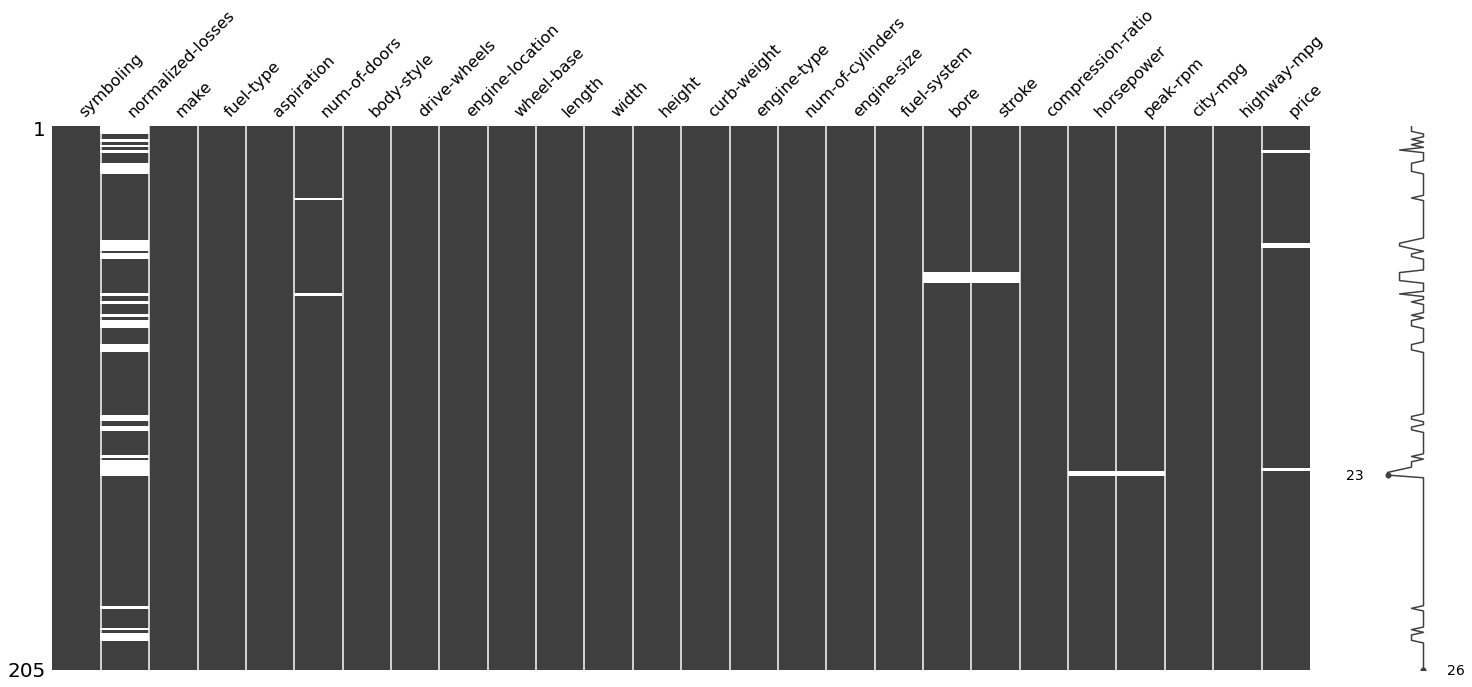

In [5]:
#graphically identify which features have missing values
msno.matrix(car);

In [6]:
# determine the number of missing values
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### - Filling 'num-of-doors' with the mode for the 'body-style'

The vehicle's style will likley affect the number of doors, therefore looked at the mode by 'body-style'.  
For example - sports cars may normally have more 2 door than 4 door models.  
While the opposite may be true for sedans and wagons. 

In [7]:
car[car['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [8]:
car[['num-of-doors','body-style']].value_counts()

num-of-doors  body-style 
four          sedan          79
two           hatchback      60
four          wagon          25
two           sedan          15
four          hatchback      10
two           hardtop         8
              convertible     6
dtype: int64

In [9]:
# sedans have mostly four doors 
# as missing values are both sedans will fill in missing values with 4

car['num-of-doors'] = car['num-of-doors'].replace(np.nan,'four')

In [10]:
# check that missing values have been filled
car[['num-of-doors','body-style']].value_counts()

num-of-doors  body-style 
four          sedan          81
two           hatchback      60
four          wagon          25
two           sedan          15
four          hatchback      10
two           hardtop         8
              convertible     6
dtype: int64

### - Filling 'normalized-losses' with the average by 'body-style'

Chosen to use the average per body-style.  
This is the average loss payment per insured vehicle year.   
In the automobile/insurance industry these are calculated on the vehicle's size/body shape - therfore best methoid to impute 
data is on the average by 'body-style'.

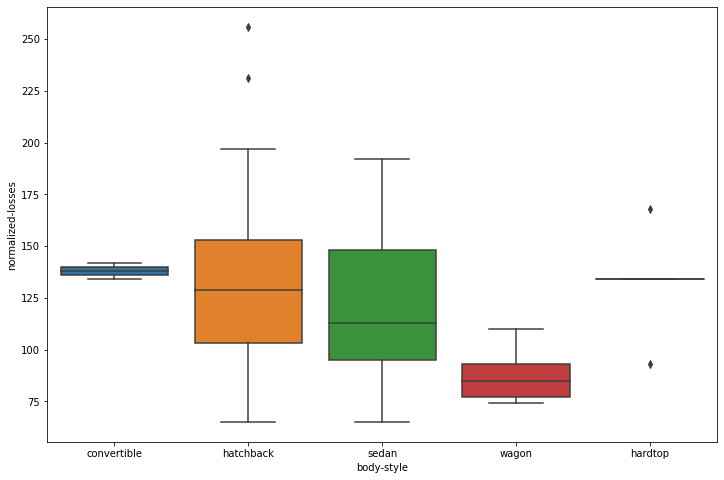

In [11]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'body-style', y = 'normalized-losses',data=car);

In [12]:
avg = car.groupby('body-style').mean()['normalized-losses']
avg

body-style
convertible    138.000000
hardtop        132.600000
hatchback      132.083333
sedan          120.700000
wagon           87.529412
Name: normalized-losses, dtype: float64

In [13]:
# the average value for normalized losses differs by body-style
# will impute based on body-style average

# calculate averages

convertible = round(car.groupby('body-style').mean()['normalized-losses'].values[0])
hardtop = round(car.groupby('body-style').mean()['normalized-losses'].values[1])
hatch = round(car.groupby('body-style').mean()['normalized-losses'].values[2])    
sedan = round(car.groupby('body-style').mean()['normalized-losses'].values[3])              
wagon = round(car.groupby('body-style').mean()['normalized-losses'].values[4])                    
                    
def fill_losses(cols):
    '''
    Can be used with the apply method on a pandas list of columns.
    Requires that the list be df.['normalized-losses','body-style']
    
    
    Parameters: List of pd dataframe columns
    Returns: Normalized-loss based on if blank and body-style
    '''
    loss = cols[0]
    style = cols[1]
    
    if pd.isnull(loss):

        if style == 'convertible':
            return convertible

        elif style == 'hatchback':
            return hatch
        
        elif style == 'sedan':
            return sedan
        
        elif style == 'wagon':
            return wagon

        else:
            return hardtop

    else:
        return loss                
                  

    
    

In [14]:
car['normalized-losses'] = car[['normalized-losses','body-style']].apply(fill_losses,axis = 1)
car.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [15]:
car[car['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [16]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,132.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### - Filling in the missing values for bore,stroke, horsepower and rpm

Here the values are all related to the engine.  
The missing values will therefore be filled in using the average by engine features.

In [17]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [18]:
car.groupby(['engine-size']).mean()[['bore','stroke','horsepower','peak-rpm']]

,bore,stroke,horsepower,peak-rpm
engine-size,,,,
61,2.910000,3.030000,48.000000,5100.000000
70,NaN,NaN,101.000000,6000.000000
79,2.910000,3.070000,60.000000,5500.000000
80,NaN,NaN,135.000000,6000.000000
90,2.990000,3.190000,68.666667,5466.666667
91,3.040000,3.150000,68.000000,5000.000000
92,2.978667,3.222000,67.600000,5340.000000
97,3.143571,3.255000,66.428571,5021.428571
98,3.135714,3.154286,85.000000,5307.142857


In [19]:
# replace the mising values for bore and stoke - Mazda vehicles
car[car.bore.isnull()].iloc[:,10:]

,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,169.0,65.7,49.6,2380,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,169.0,65.7,49.6,2385,rotor,two,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,169.0,65.7,49.6,2500,rotor,two,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [20]:
car.iloc[55:59,18:20] = [2.91,3.05]

In [21]:
car.groupby('engine-type').mean()[['horsepower','peak-rpm']]

,horsepower,peak-rpm
engine-type,,
dohc,146.000000,5375.000000
dohcv,288.000000,5750.000000
l,95.500000,4704.166667
ohc,93.698630,5133.904110
ohcf,110.400000,5000.000000
ohcv,169.538462,5015.384615
rotor,109.500000,6000.000000


In [22]:
car[car['horsepower'].isnull()]['engine-type']

130    ohc
131    ohc
Name: engine-type, dtype: object

In [23]:
car.iloc[130:132][['horsepower','peak-rpm']] = [93.698630,5133.904110]

In [24]:
car.iloc[130:132]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,88.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,93.69863,5133.90411,23,31,9295.0
131,2,132.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,93.69863,5133.90411,23,31,9895.0


<AxesSubplot:>

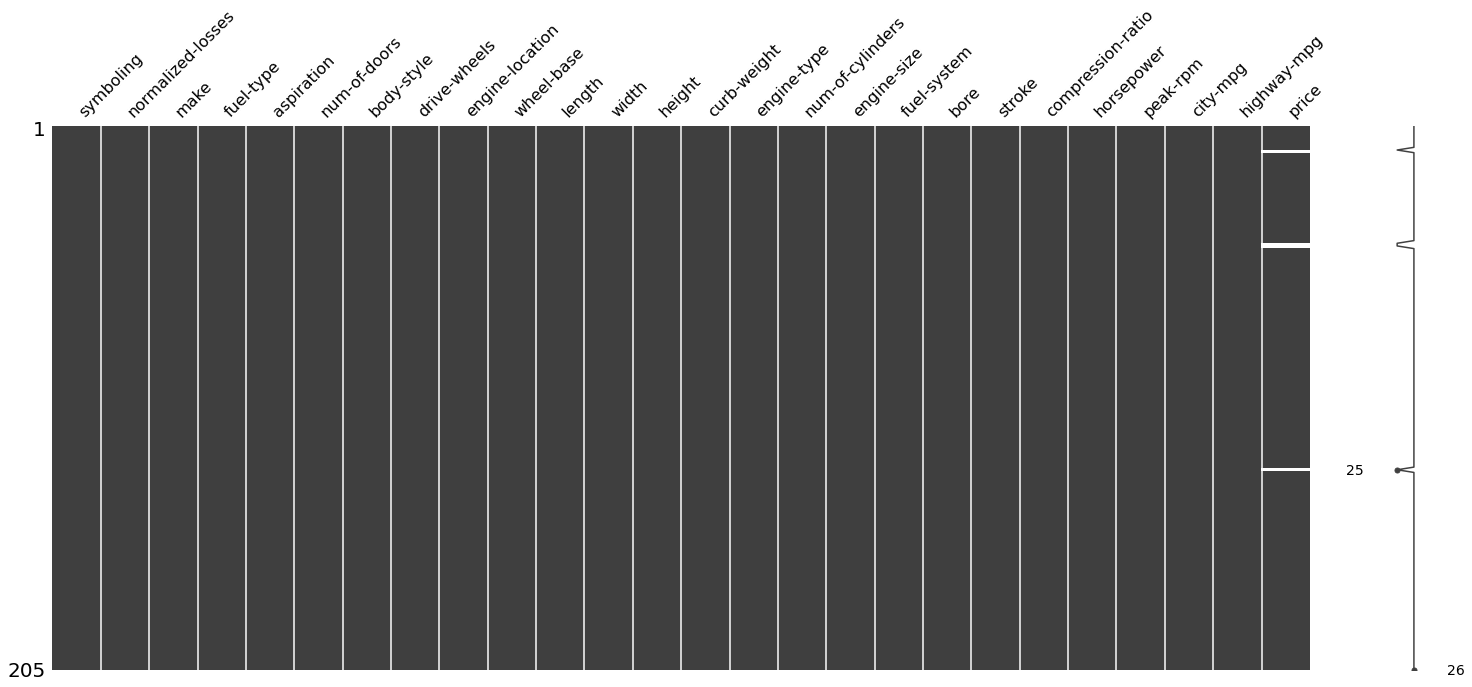

In [25]:
msno.matrix(car)

### - Filling the last missing feature, Price

In [26]:
car[car.price.isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,132.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,121.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,121.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,132.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [27]:
def fill_price(cols):
    
    make = cols[0]
    price_original = cols[1]
    
    if pd.isnull(price_original):
        price_avg = car.groupby('make').mean()['price'].loc[make]
        return price_avg
    else:
        return price_original
    
car['price'] = car[['make','price']].apply(fill_price,axis = 1)
        

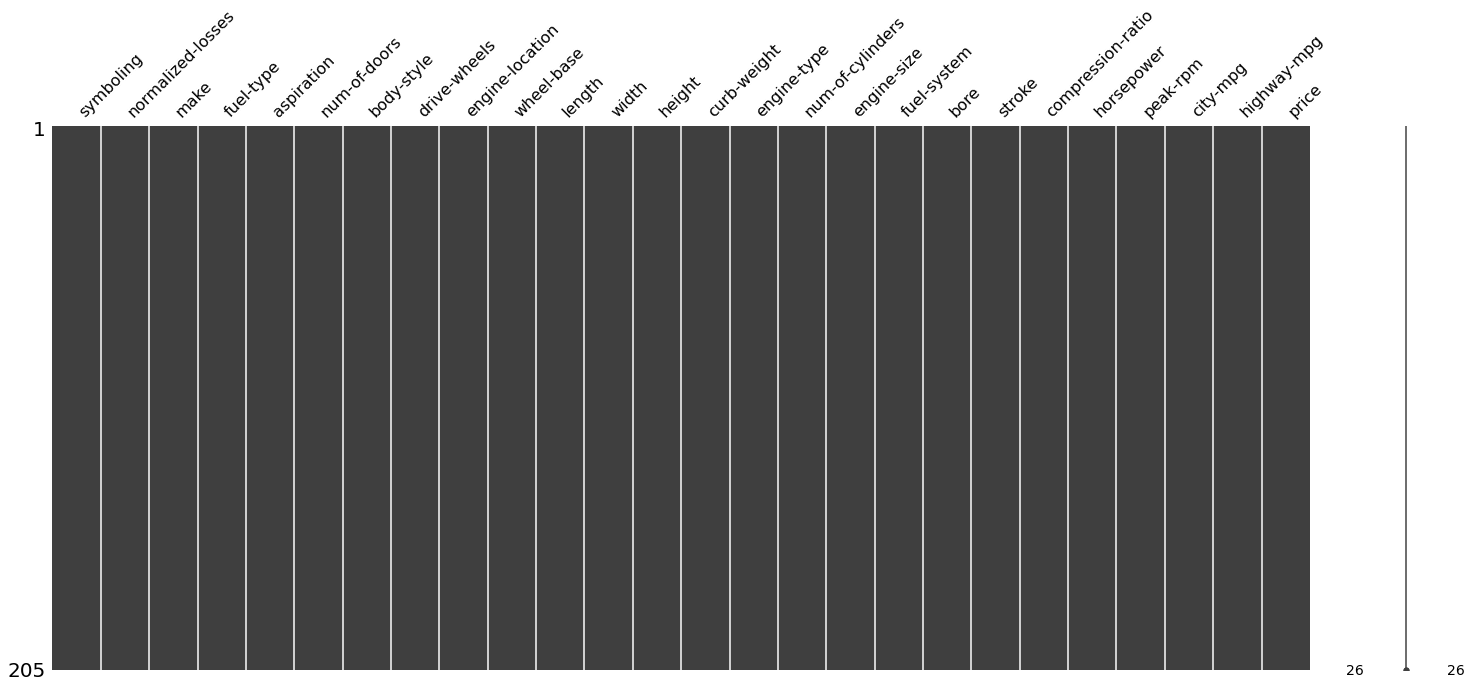

In [29]:
msno.matrix(car);

## Data Exploration and Analysis

The data contains features that describe a vehicle as well as its price.  
The focus of this analysis will therefore be to determine what features/attributes of a  
vehicle have an impact on its price. 

As price is a focus for the EDA, we can categorise it into bins. 

In [33]:
binwidth = int((max(car.price)-min(car.price))/3)
bins = range(int(min(car.price)),int(max(car.price)),binwidth)
car['price_group'] = pd.cut(car['price'],bins,labels = ["Low","Medium","High"])

In [34]:
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,price_group
0,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low
1,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low
2,1,132.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Low
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low


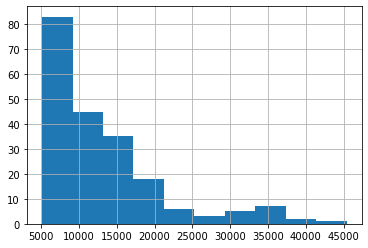

In [42]:
car.price.hist();

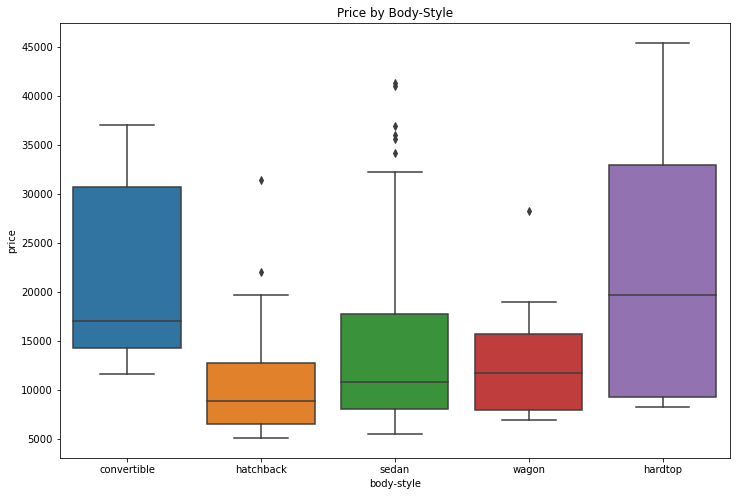

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(x = car['body-style'],y=car['price'],data=car)
plt.title('Price by Body-Style');

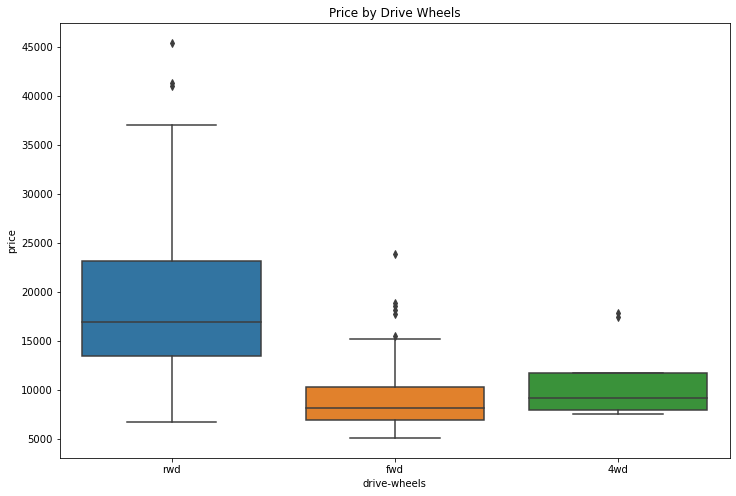

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(x = car['drive-wheels'],y=car['price'],data=car)
plt.title('Price by Drive Wheels');

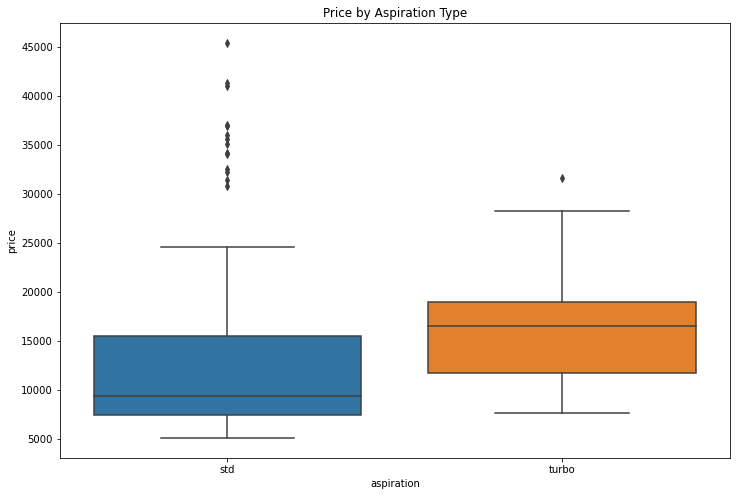

In [45]:
plt.figure(figsize=(12,8))
sns.boxplot(x = car['aspiration'],y=car['price'],data=car)
plt.title('Price by Aspiration Type');

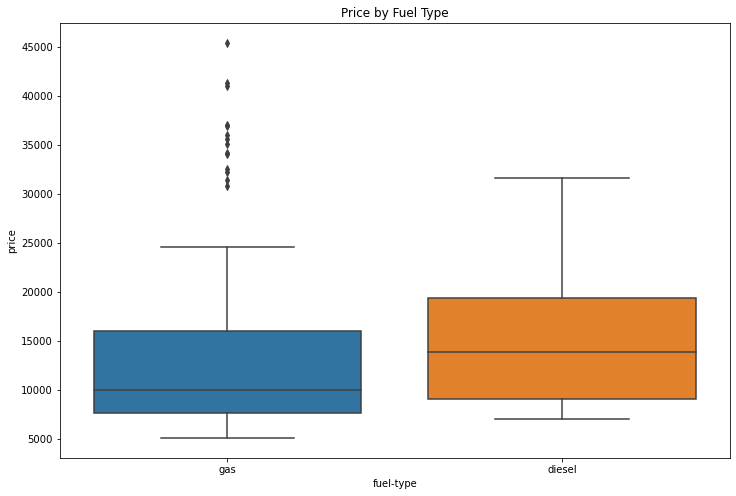

In [46]:
plt.figure(figsize=(12,8))
sns.boxplot(x = car['fuel-type'],y=car['price'],data=car)
plt.title('Price by Fuel Type');

Car prices are normally distrubted and skewed to the right.  
Hardtops have the most variance in price as well as the highest price on average,  
this is followed by convertibles, wagons, sedans and finally hatchbacks which have the lowest average price.   
RWD vehicles tend to be the most expenisve drive wheel type.  
Turbo vehicles tend to cost more than those which are naturally aspirated   
and diesel vehicles are more expensive on average than gas, while gas data did contain more outliers. 

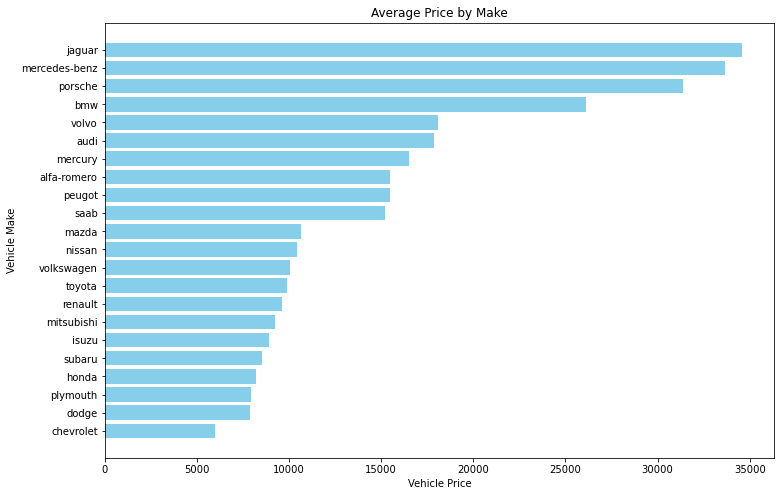

In [112]:
price_by_make = round(car.groupby('make').mean().price,0)
price_sort = price_by_make.sort_values()
plt.figure(figsize=(12,8))
plt.barh(y = price_sort.index,width = price_sort.values,color = 'skyblue')
plt.title("Average Price by Make")
plt.xlabel('Vehicle Price')
plt.ylabel('Vehicle Make');


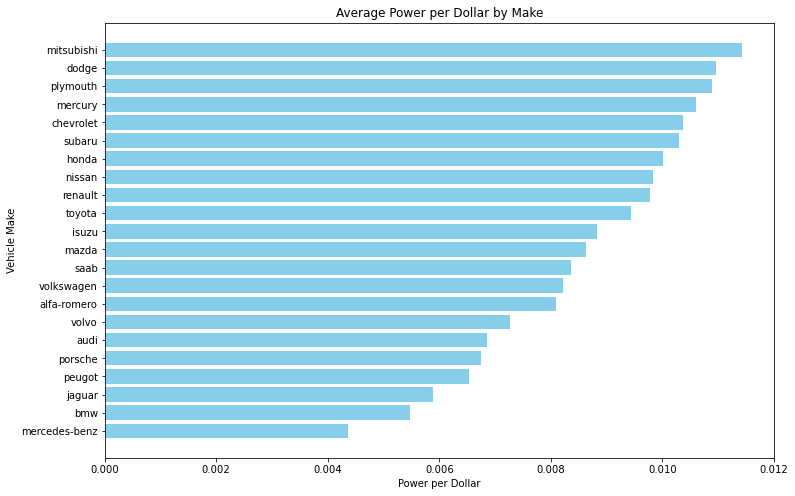

In [124]:
car['power_per_dollar'] = (car.horsepower/car.price)
power_dollar_by_make = car.groupby('make').mean().power_per_dollar
price_sort = power_dollar_by_make.sort_values()
plt.figure(figsize=(12,8))
plt.barh(y = price_sort.index,width = price_sort.values,color = 'skyblue')
plt.title("Average Power per Dollar by Make")
plt.xlabel('Power per Dollar')
plt.ylabel('Vehicle Make');

The five most expenisve car makes on average are Jaguar, Mercedes, Porsche, BMW and Volvo.  
The five cheapest are Subaru, Honda, Plymouth, Dodge and Chevrolet.  

When it comes to horsepower per dollar the vehicle makes that give consumers the most power for the their   
dollar are Mitsubishi, Dodge, Plymouth, Mercury and Chevrolet. 


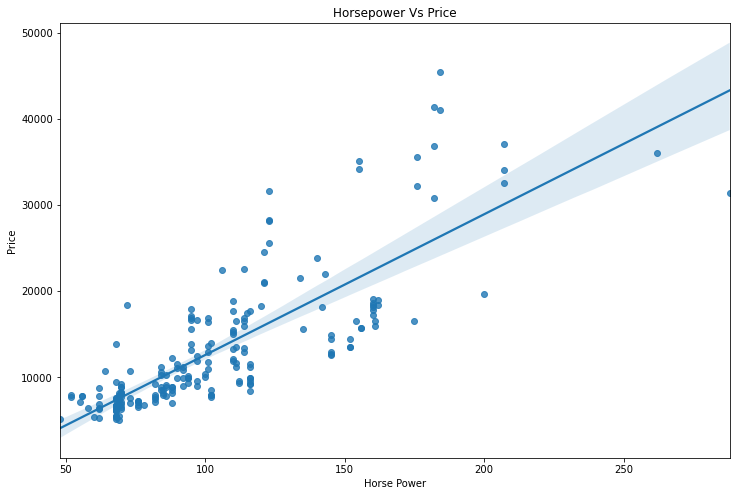

In [125]:
plt.figure(figsize=(12,8))
sns.regplot(x = car['horsepower'], y = car['price'])
plt.title("Horsepower Vs Price")
plt.xlabel('Horse Power')
plt.ylabel('Price');


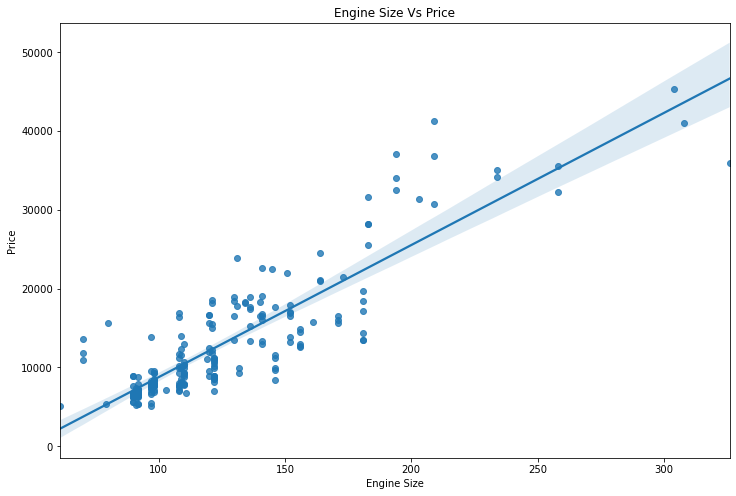

In [126]:
plt.figure(figsize=(12,8))
sns.regplot(x = car['engine-size'], y = car['price'])
plt.title("Engine Size Vs Price")
plt.xlabel('Engine Size')
plt.ylabel('Price');


Both engine size and horsepower are positive correlated with price. 

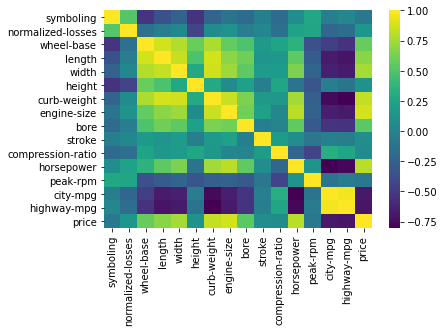

In [109]:
corr_matrix=car.corr()

sns.heatmap(corr_matrix, cmap='viridis');
